In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#import keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

mnist = tf.keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

#Normalize the features
train_features, test_features = train_features/255.0, test_features/255.0



In [10]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [2]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(train_features, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3281 - accuracy: 0.9080
Epoch 2/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1578 - accuracy: 0.9548
Epoch 3/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1195 - accuracy: 0.9640
Epoch 4/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0983 - accuracy: 0.9699
Epoch 5/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0825 - accuracy: 0.9747
Epoch 6/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0696 - accuracy: 0.9779s - loss: 0.0692 - accu
Epoch 7/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0621 - accuracy: 0.9801
Epoch 8/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0546 - accuracy: 0.9827
Epoch 9/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0492 - accuracy

In [5]:
model.evaluate(test_features, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24762390301595355, 0.9705]

In [6]:
test_image = test_features[200]
test_image = test_image.reshape(1,28,28)
result = model.predict(test_image)
print(result)

[[6.5850416e-23 6.4825445e-32 1.2253792e-19 1.0000000e+00 0.0000000e+00
  2.9348267e-11 4.9062200e-31 3.5041009e-30 9.5334352e-11 5.3785580e-15]]


In [7]:
result.argmax()

3

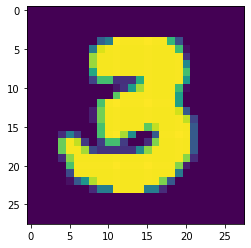

In [9]:
plt.imshow(test_features[200])